In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_used_cars_10k.csv
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/layouts.py
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/install_deps.py
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/README.md
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/app.py
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/utils.py
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/callbacks.py
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/requirements.txt
/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_car_analysis_project_v1.0.zip/uae car analsis/

In [2]:
df = pd.read_csv('/kaggle/input/uae-used-cars-analysis-full-project-v1-0/uae_used_cars_10k.csv')

In [3]:
df

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,toyota,camry,2016,47819,156500,Sedan,4,Automatic Transmission,Gasoline,Black,Dubai,"2016 toyota camry with Rear camera, Leather se..."
1,kia,sorento,2013,61250,169543,SUV,4,Automatic Transmission,Gasoline,Grey,Abu Dhabi,"2013 kia sorento with Sunroof, Adaptive cruise..."
2,mini,cooper,2023,31861,221583,Soft Top Convertible,4,Automatic Transmission,Gasoline,Grey,Dubai,"2023 mini cooper with Adaptive cruise control,..."
3,nissan,altima,2016,110322,69754,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2016 nissan altima with Rear camera, Adaptive ..."
4,toyota,land-cruiser-76-series,2020,139994,71399,Pick Up Truck,4,Manual Transmission,Gasoline,White,Dubai,2020 toyota land-cruiser-76-series with Adapti...
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,tesla,model-3,2018,273413,76920,Sedan,NaN,Automatic Transmission,Electric,White,Dubai,"2018 tesla model-3 with Bluetooth, Sunroof, Le..."
9996,audi,a3,2022,80053,258150,Sedan,4,Automatic Transmission,Gasoline,Red,Dubai,"2022 audi a3 with Sunroof, Bluetooth, Rear cam..."
9997,toyota,prado,2014,183381,80525,SUV,6,Automatic Transmission,Gasoline,White,Dubai,"2014 toyota prado with Rear camera, Adaptive c..."
9998,peugeot,expert,2016,40876,288305,Utility Truck,4,Automatic Transmission,Diesel,White,Dubai,"2016 peugeot expert with Navigation system, Re..."


# DATA PREPROCESSING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          10000 non-null  object
 1   Model         10000 non-null  object
 2   Year          10000 non-null  int64 
 3   Price         10000 non-null  int64 
 4   Mileage       10000 non-null  int64 
 5   Body Type     10000 non-null  object
 6   Cylinders     9895 non-null   object
 7   Transmission  10000 non-null  object
 8   Fuel Type     10000 non-null  object
 9   Color         10000 non-null  object
 10  Location      10000 non-null  object
 11  Description   10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


In [5]:
df.describe()

,Year,Price,Mileage
count,10000.000000,1.000000e+04,10000.000000
mean,2014.472800,2.452345e+05,155161.871700
std,5.790839,4.709773e+05,83681.858983
min,2005.000000,7.183000e+03,10006.000000
25%,2009.000000,5.035250e+04,82904.000000
50%,2014.000000,1.027660e+05,154370.500000
75%,2019.000000,2.312480e+05,227551.250000
max,2024.000000,1.468698e+07,299996.000000


In [6]:
df.isnull().sum()

Make              0
Model             0
Year              0
Price             0
Mileage           0
Body Type         0
Cylinders       105
Transmission      0
Fuel Type         0
Color             0
Location          0
Description       0
dtype: int64

In [7]:
df['Cylinders'] = df['Cylinders'].replace({'Unknown':'0'})

In [8]:
df['Cylinders'].value_counts()

Cylinders
6     3420
8     3003
4     2929
12     340
3       53
5       52
0       50
10      48
Name: count, dtype: int64

In [9]:
df['Cylinders'].fillna(df['Cylinders'].mode()[0], inplace=True)

In [10]:
df['Cylinders'] = df['Cylinders'].astype(int)

In [11]:
df['Cylinders'].fillna(df['Cylinders'].mode()[0], inplace=True)

In [12]:
df['Cylinders']

0       4
1       4
2       4
3       4
4       4
       ..
9995    6
9996    4
9997    6
9998    4
9999    4
Name: Cylinders, Length: 10000, dtype: int64

In [13]:
df['Cylinders'].value_counts()

Cylinders
6     3525
8     3003
4     2929
12     340
3       53
5       52
0       50
10      48
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          10000 non-null  object
 1   Model         10000 non-null  object
 2   Year          10000 non-null  int64 
 3   Price         10000 non-null  int64 
 4   Mileage       10000 non-null  int64 
 5   Body Type     10000 non-null  object
 6   Cylinders     10000 non-null  int64 
 7   Transmission  10000 non-null  object
 8   Fuel Type     10000 non-null  object
 9   Color         10000 non-null  object
 10  Location      10000 non-null  object
 11  Description   10000 non-null  object
dtypes: int64(4), object(8)
memory usage: 937.6+ KB


In [15]:
df.columns

Index(['Make', 'Model', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders',
       'Transmission', 'Fuel Type', 'Color', 'Location', 'Description'],
      dtype='object')

In [16]:
# feat = ['Make', 'Model', 'Body Type','Transmission', 'Fuel Type', 'Color', 'Location', 'Description']
feat = ['Make', 'Model', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders',
       'Transmission', 'Fuel Type', 'Color', 'Location', 'Description']

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [19]:
for column in feat:
    df[column] = le.fit_transform(df[column])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Make          10000 non-null  int64
 1   Model         10000 non-null  int64
 2   Year          10000 non-null  int64
 3   Price         10000 non-null  int64
 4   Mileage       10000 non-null  int64
 5   Body Type     10000 non-null  int64
 6   Cylinders     10000 non-null  int64
 7   Transmission  10000 non-null  int64
 8   Fuel Type     10000 non-null  int64
 9   Color         10000 non-null  int64
 10  Location      10000 non-null  int64
 11  Description   10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


# DATA VIZUALIZAION
> By the help of plots, we can clearly see the presence of im-balanced data.

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [22]:
cols = ['Make', 'Model', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders',
       'Transmission', 'Fuel Type', 'Color', 'Location', 'Description']

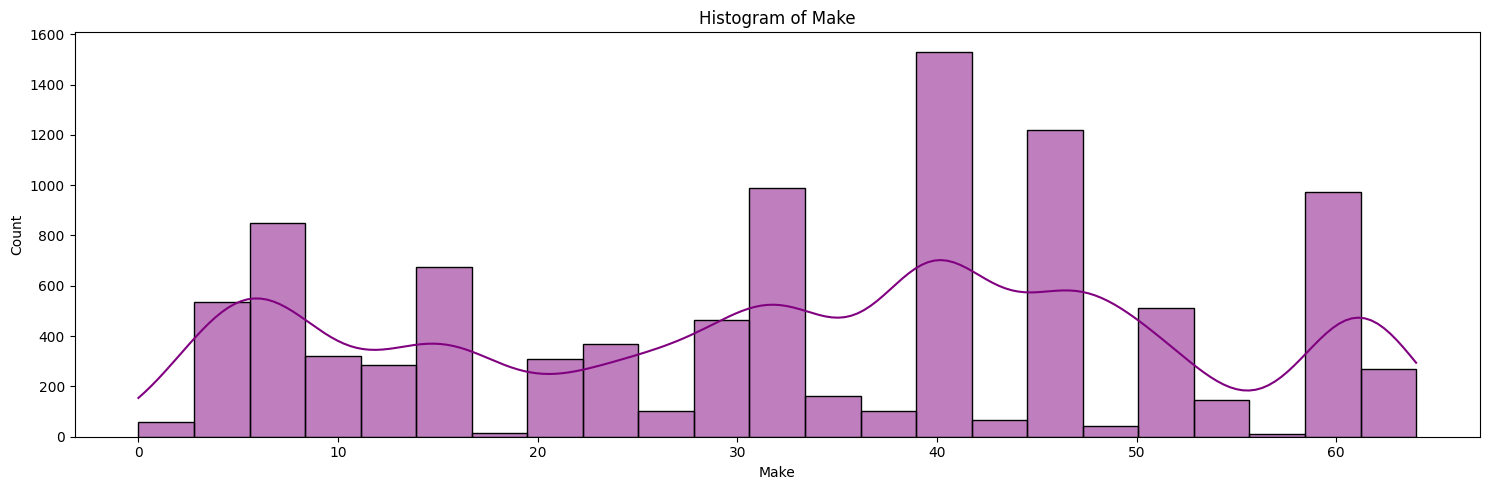

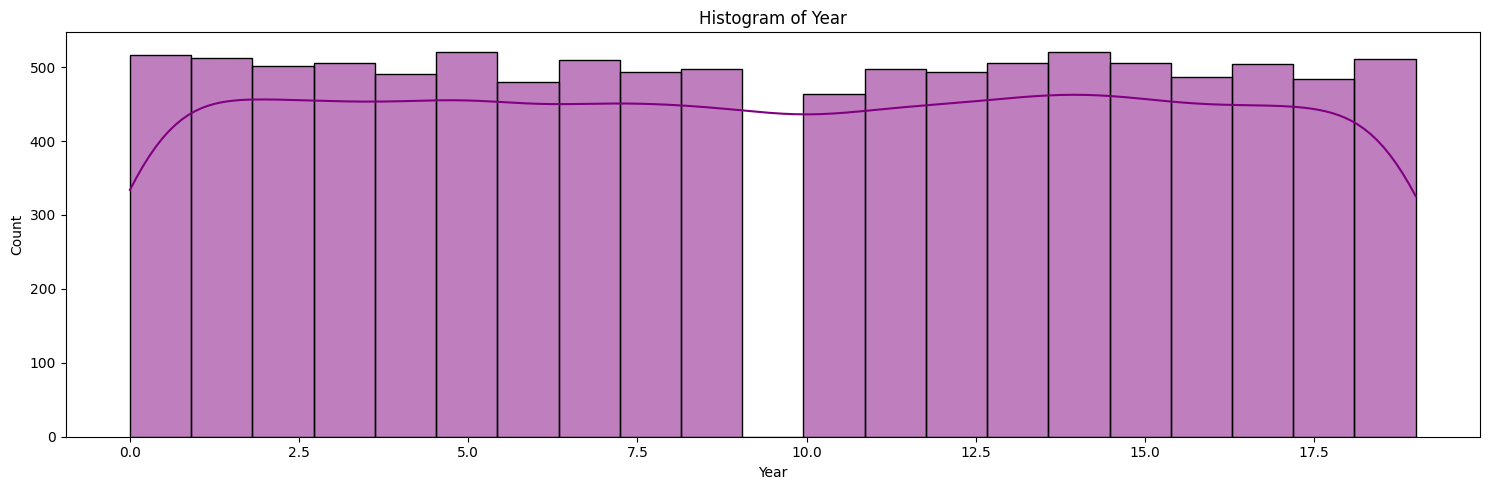

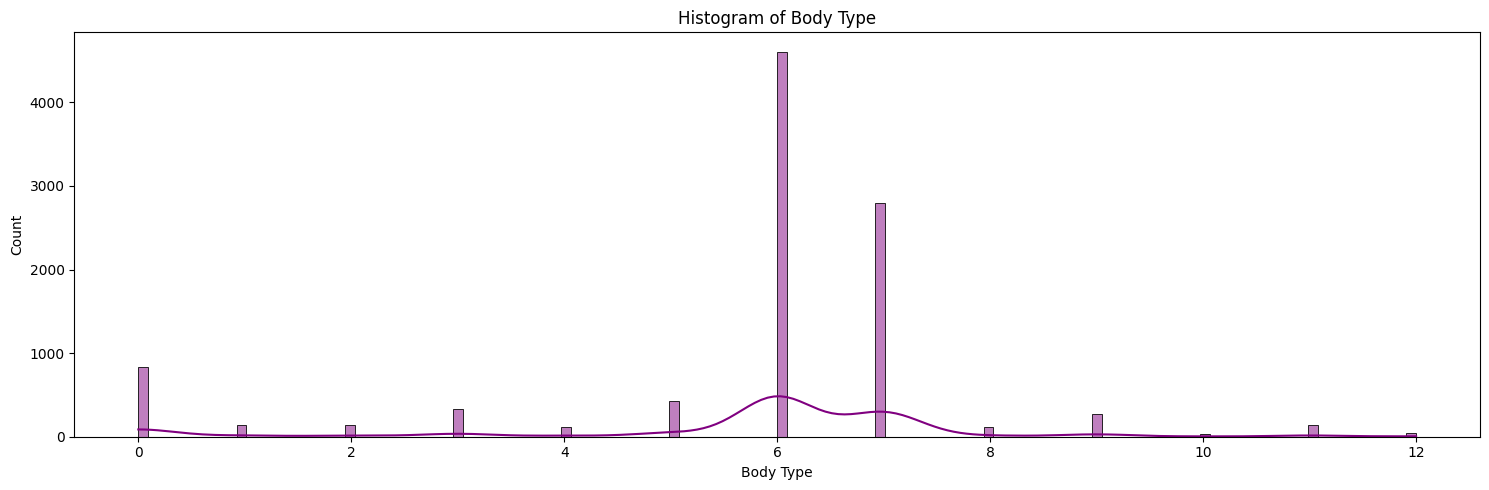

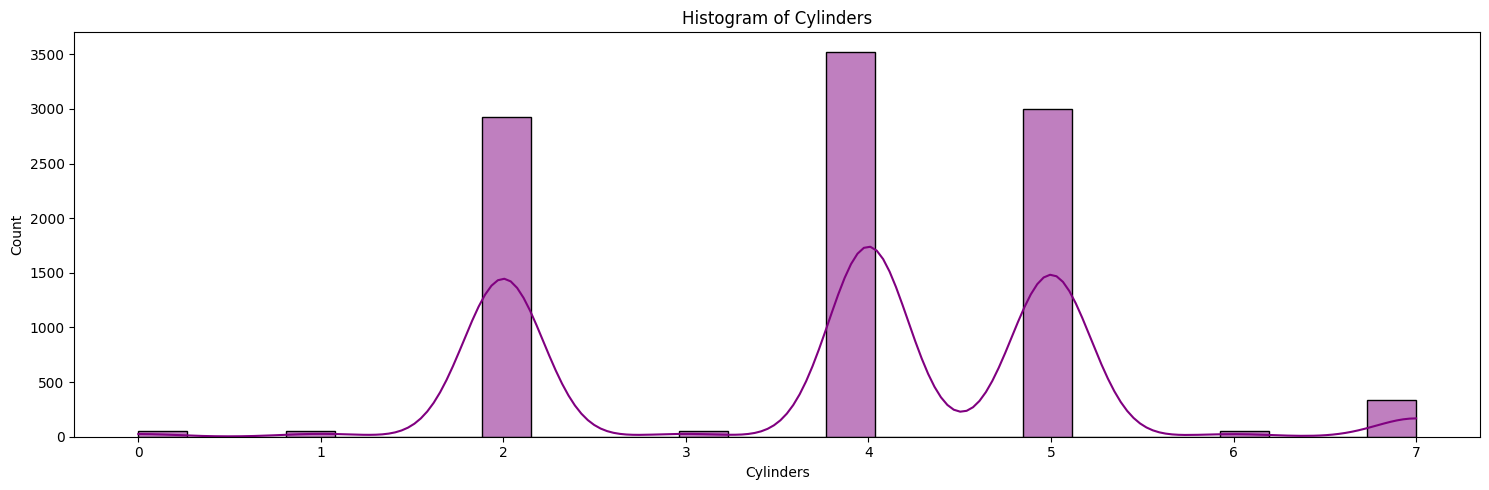

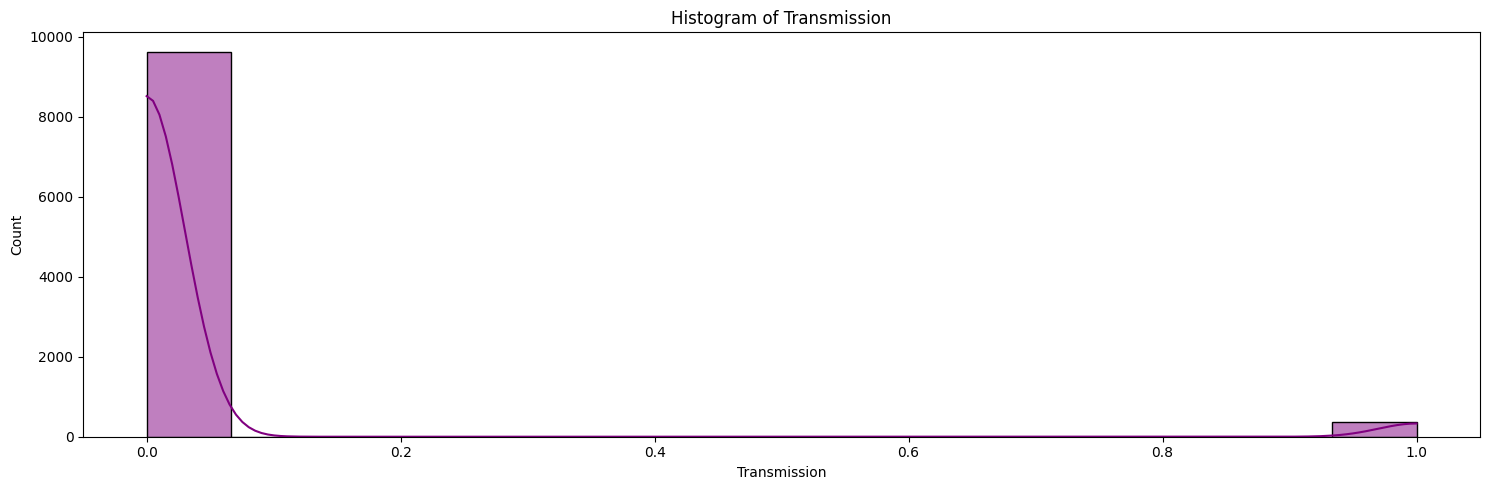

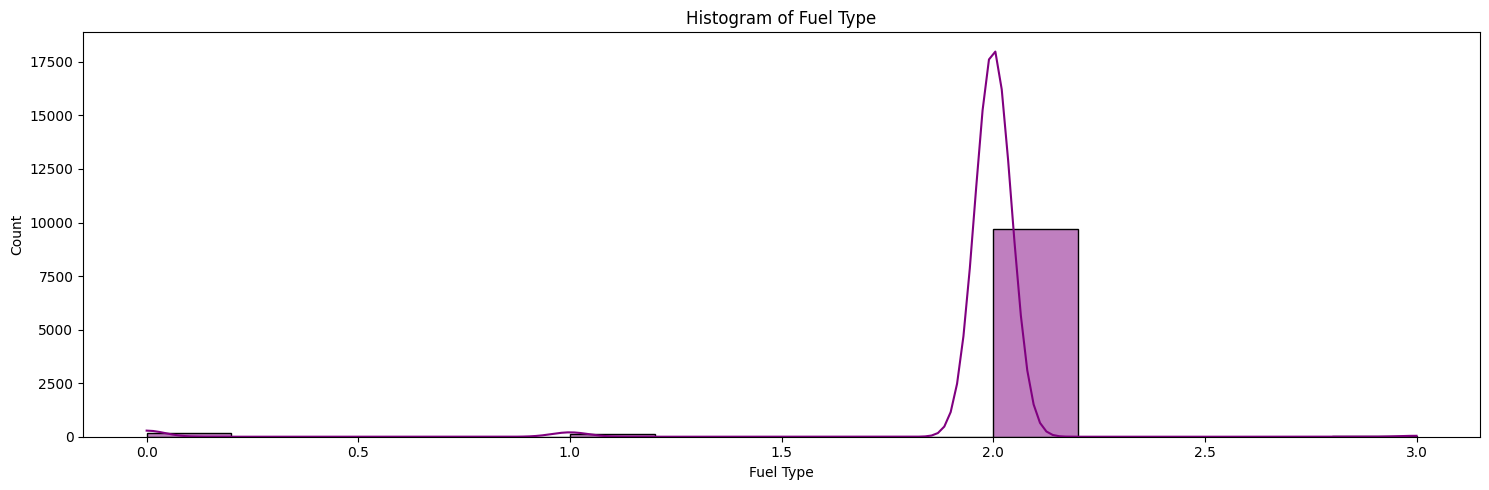

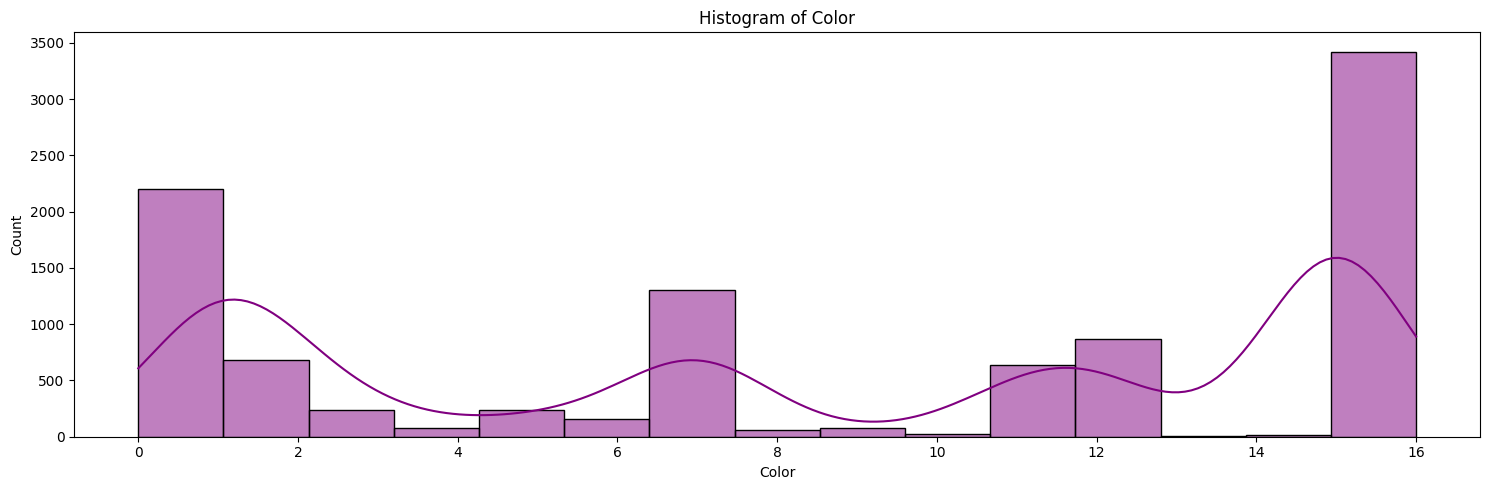

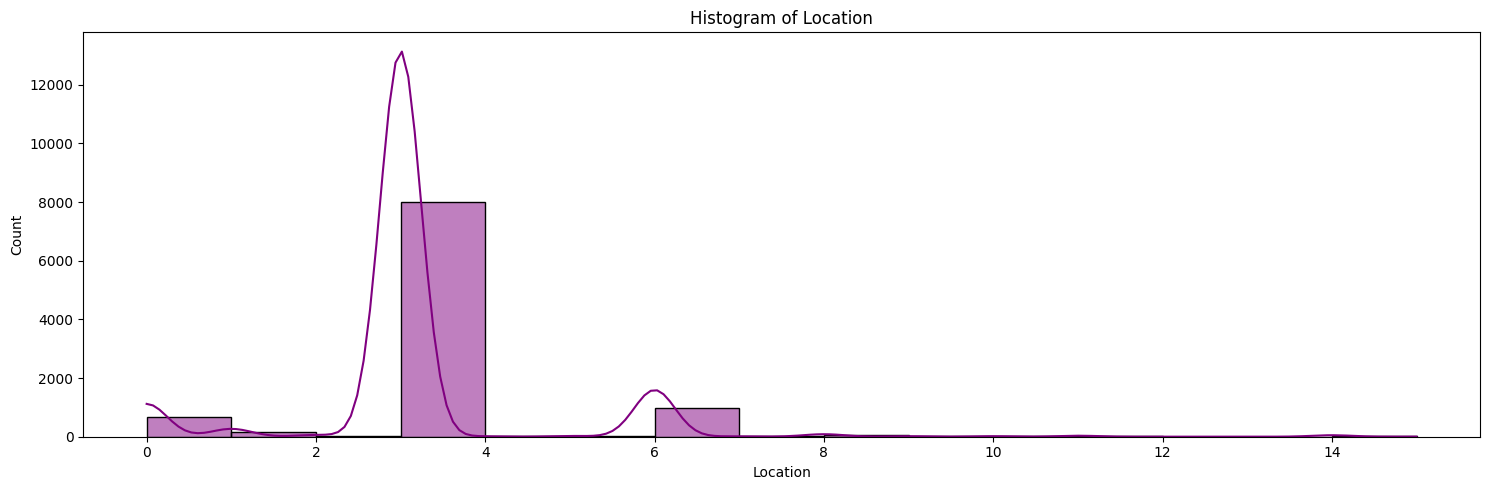

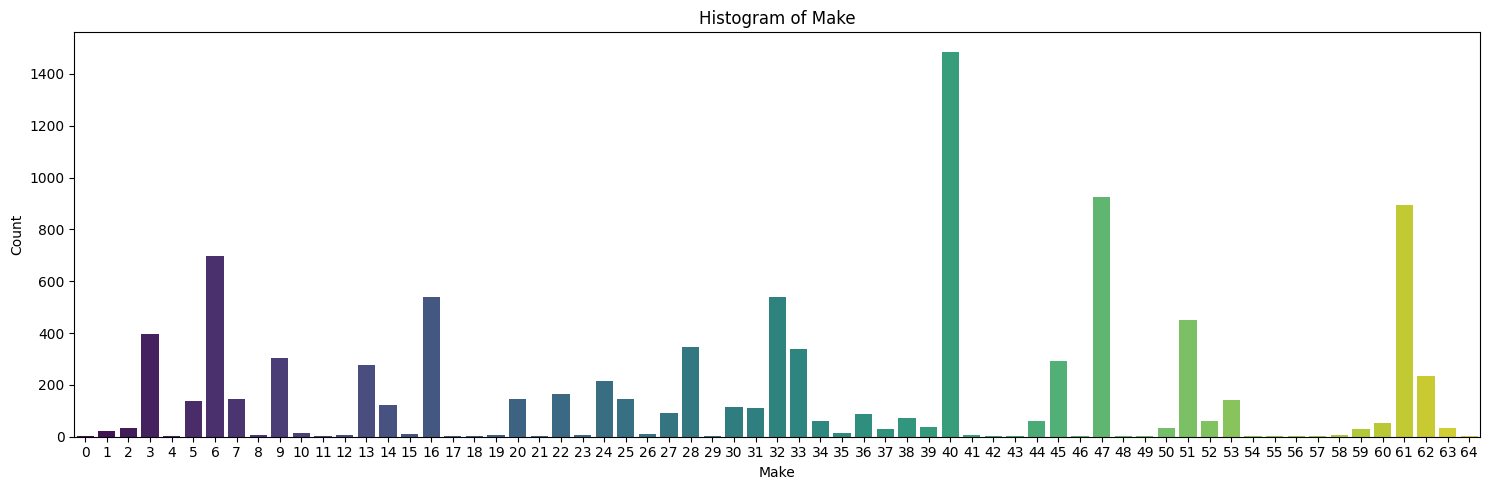

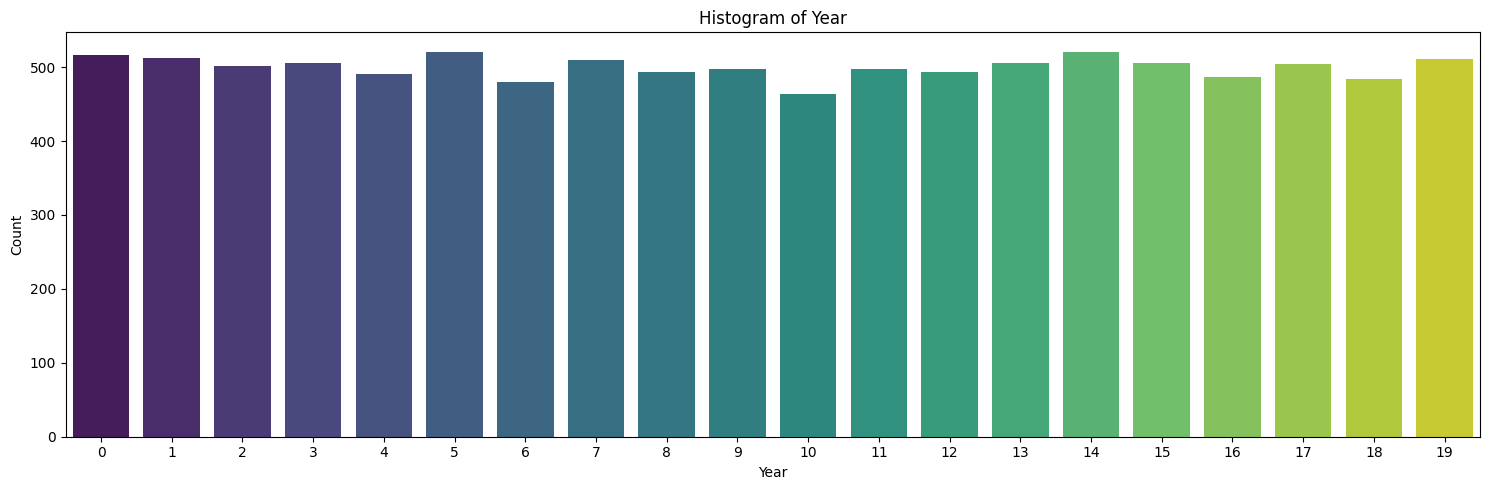

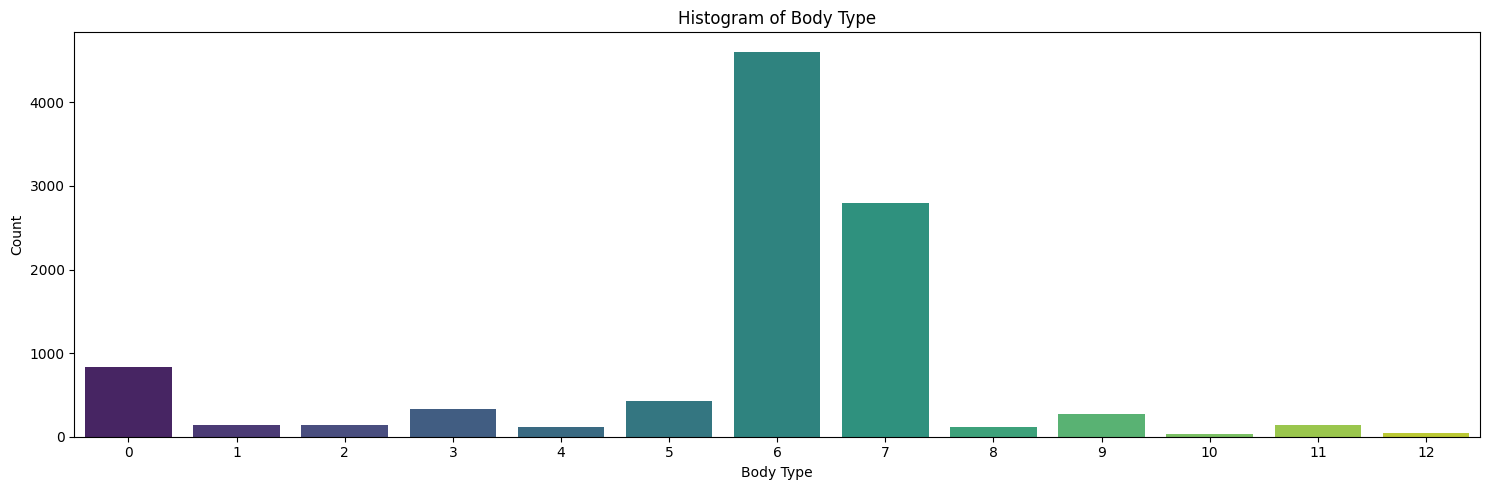

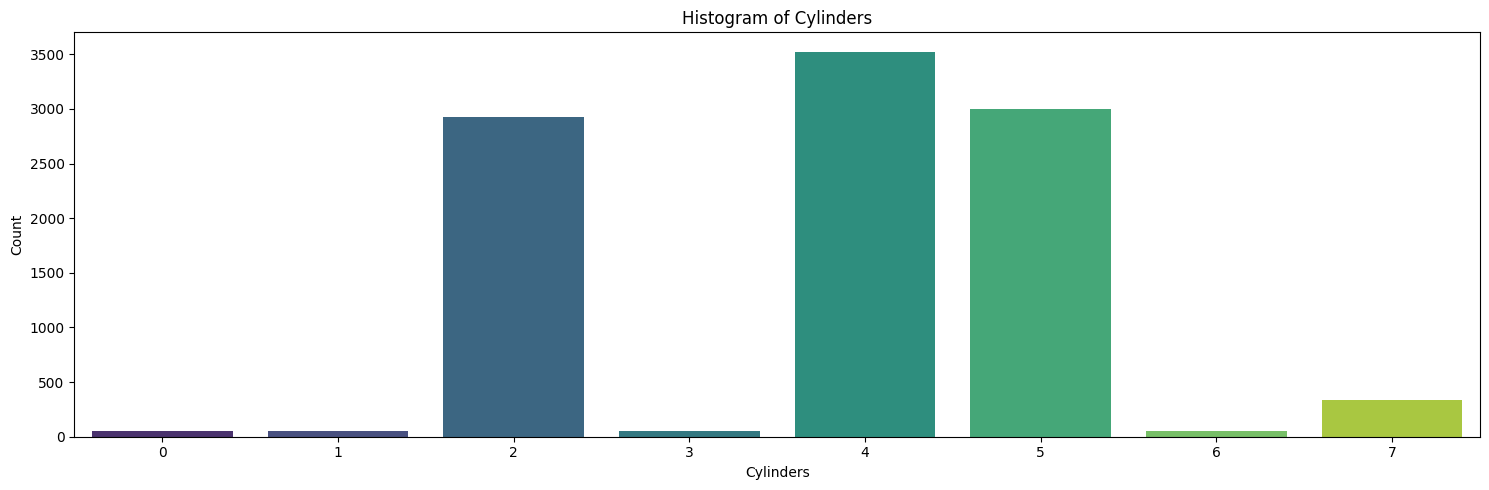

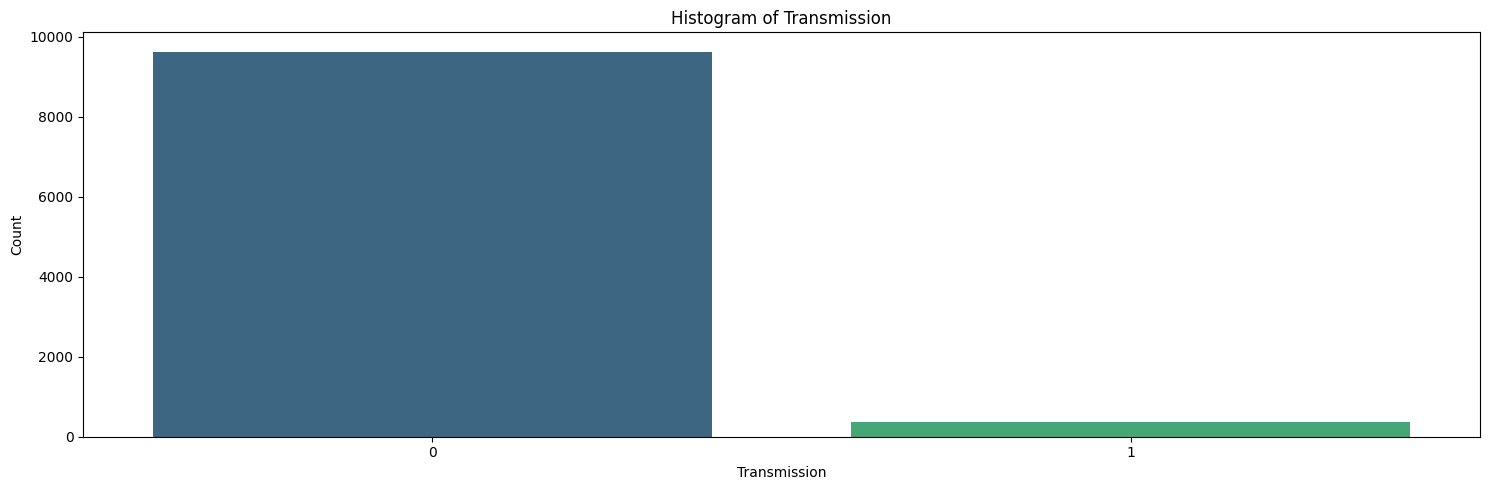

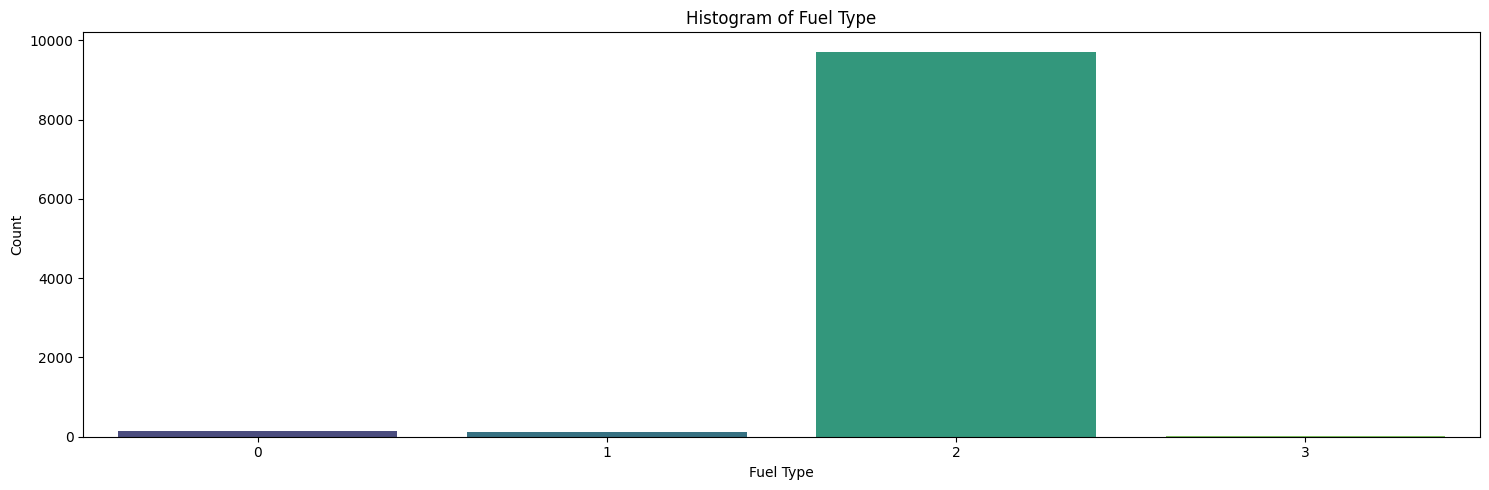

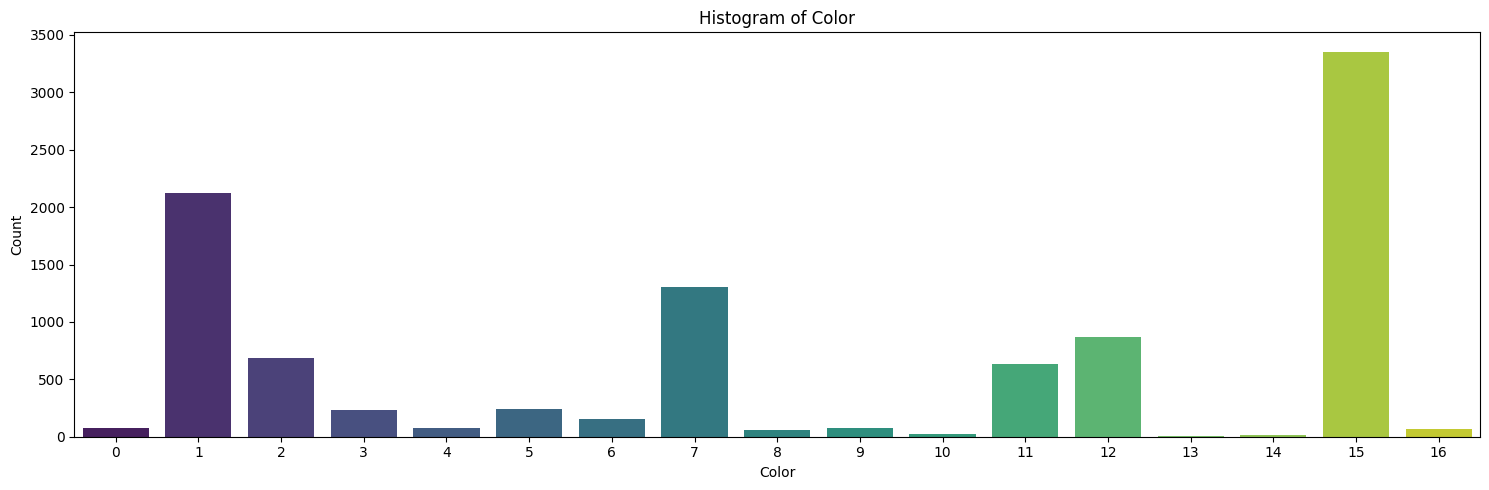

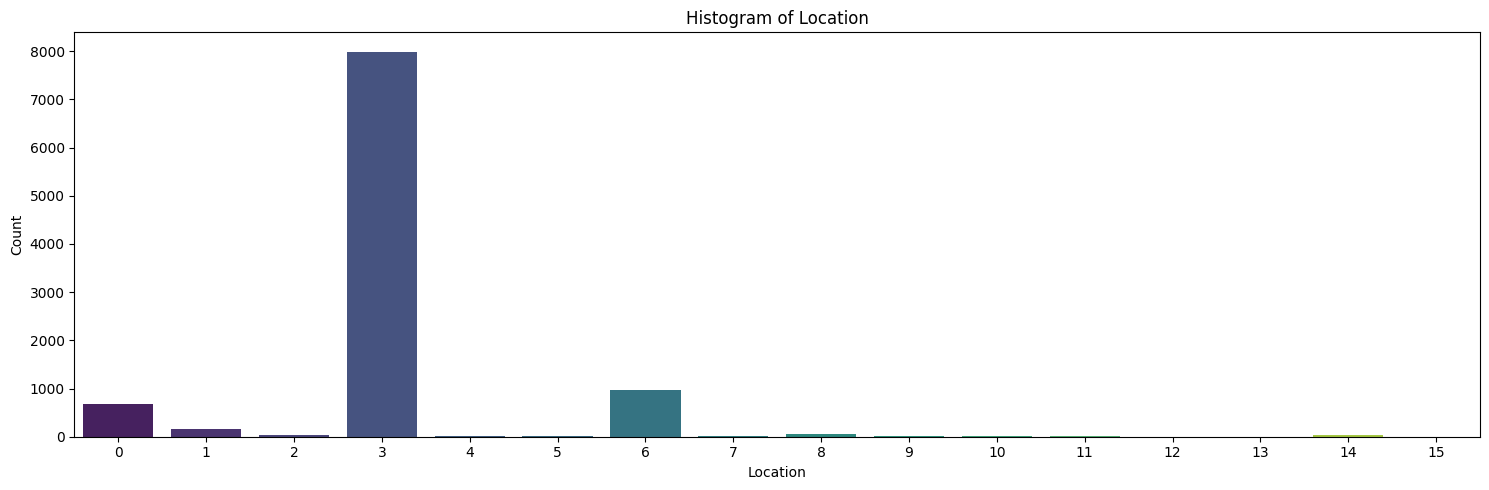

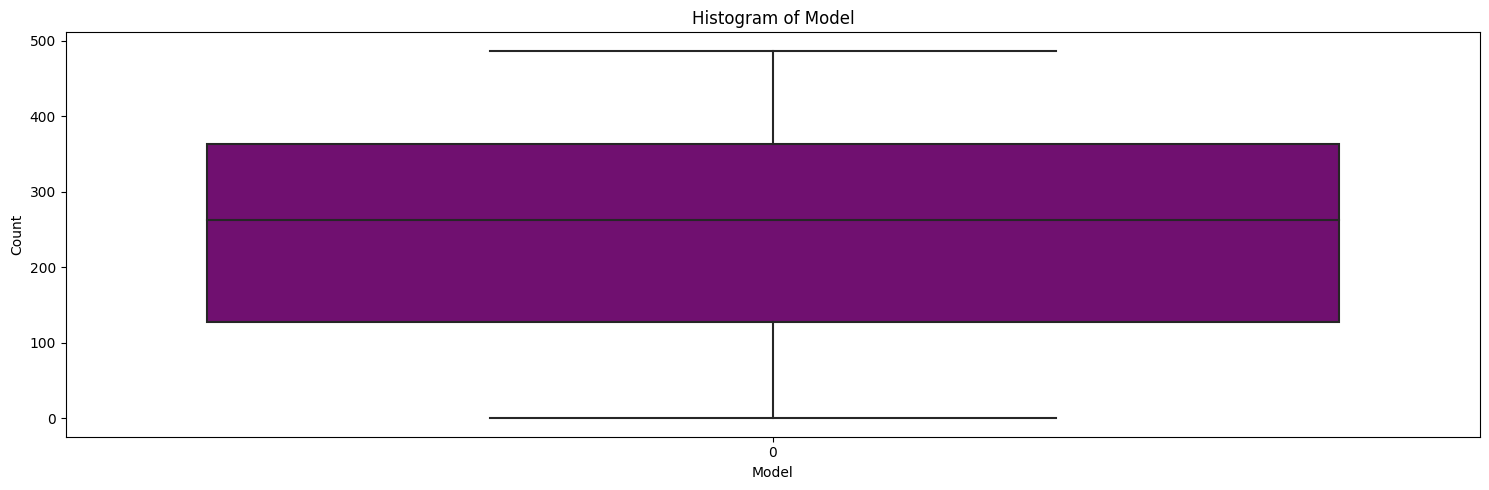

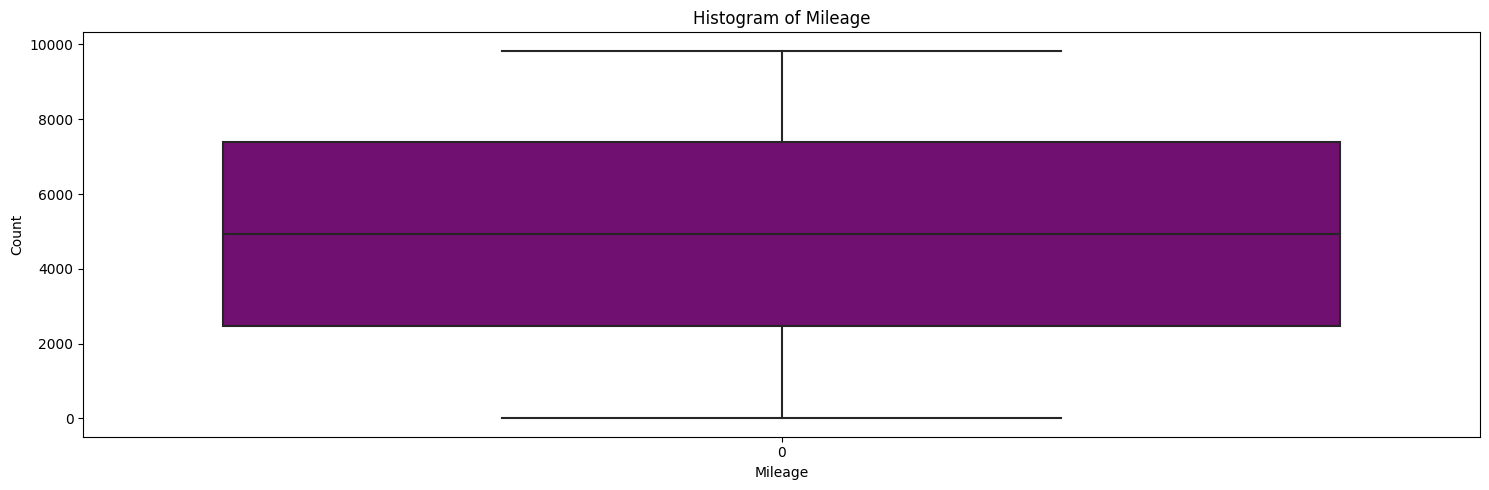

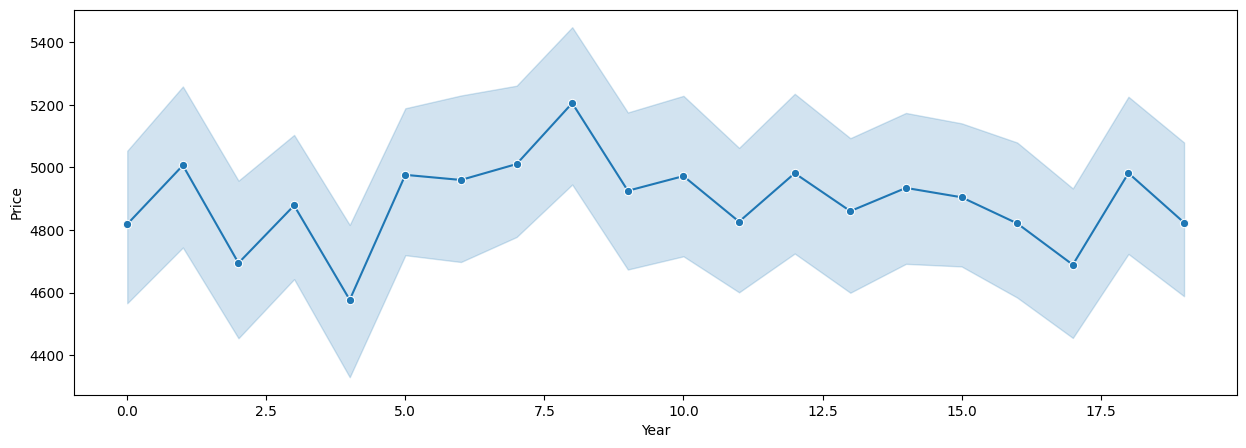

In [23]:
cat_feat = ['Make','Year', 'Body Type', 'Cylinders','Transmission', 'Fuel Type', 'Color', 'Location']


# HISTOGRAM PLOT

for features in cat_feat:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.histplot(df[features].dropna(),color ='purple',kde=True)
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()



#COUNT PLOT

for features in cat_feat:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.countplot(x=features,data=df, palette='viridis')
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()


# Box PLOT

lin = ['Model','Mileage']

for features in lin:
    if features in df.columns:
        plt.figure(figsize=(15,5))
        sns.boxplot(df[features].dropna(), color='purple')
        plt.title(f'Histogram of {features}')
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()




# LINE PLOT

plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='Year', y ='Price',marker='o')
plt.show()




**By the help of count plot we can clearly see the dataset is imbalanced.**

In [24]:
df

,Make,Model,Year,Price,Mileage,Body Type,Cylinders,Transmission,Fuel Type,Color,Location,Description
0,61,96,11,2269,4989,7,2,0,2,1,3,5931
1,30,412,8,3069,5425,6,2,0,2,7,0,4236
2,44,125,18,1115,7179,8,2,0,2,7,3,9314
3,47,60,11,5089,2004,7,2,0,2,11,3,5851
4,61,270,15,5887,2067,5,2,1,2,15,3,7979
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,60,299,13,7741,2249,7,4,0,1,15,3,6926
9996,3,50,17,3996,8410,7,2,0,2,11,3,8491
9997,61,340,9,6770,2390,6,4,0,2,15,3,4992
9998,50,178,11,1781,9432,10,2,0,0,15,3,5898


In [25]:
df['Price'].sample(15)

2799     117
4406    8889
5388    8486
3492    4780
9634    3629
7135    9016
6432    4138
3541    2261
4164    6994
2665    3341
8392    9445
7348    9438
1131     197
5532    5237
3947    5650
Name: Price, dtype: int64

In [26]:
df.columns

Index(['Make', 'Model', 'Year', 'Price', 'Mileage', 'Body Type', 'Cylinders',
       'Transmission', 'Fuel Type', 'Color', 'Location', 'Description'],
      dtype='object')

# MODEL

In [27]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,mean_absolute_error

In [28]:
X = df.drop(columns=['Price','Fuel Type','Transmission','Description','Year'])
y = df['Price']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=300, learning_rate=0.01,max_depth=5)

In [31]:
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred_xg = model.predict(X_test)

In [33]:
r2score = r2_score(y_test,y_pred_xg)
mae = mean_absolute_error(y_test,y_pred_xg)
print(f'R2-Score:',r2score)
print(f'MAE:',mae)

R2-Score: 0.5038738759989478
MAE: 1637.3837803955078


In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Cross-validated R2:", scores.mean())

Cross-validated R2: 0.4798784442180796


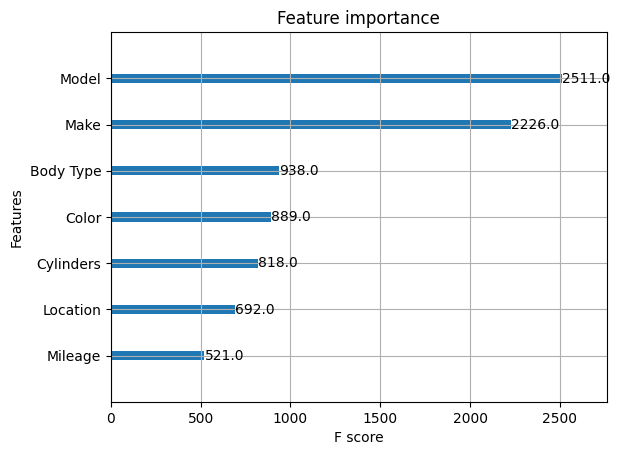

In [35]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model)
plt.show()


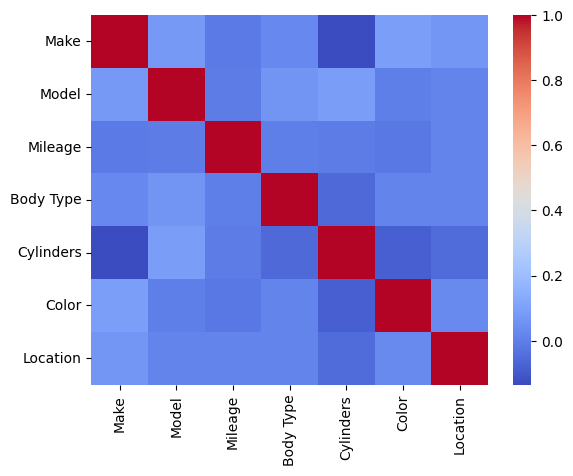

In [36]:
corr_matrix = pd.DataFrame(X_train).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.show()


In [37]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

rf_r2 = rf_model.score(X_test, y_test)
print(f"RandomForest R2 Score: {rf_r2}")


RandomForest R2 Score: 0.6212146510594793


In [38]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(n_estimators=450, learning_rate=0.06, max_depth=40)
model.fit(X_train, y_train)
print("LightGBM R²:", model.score(X_test, y_test))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 7
[LightGBM] [Info] Start training from score 4884.446875
LightGBM R²: 0.6554489518640545


# CONCLUSION:
> 
* As we clearly see the R2-Score of **LGBMRegressor** and  **RandomFroestRegressor** Performs well as Compare to XG-Boost.
*  But further need to Fine-tuening for optimal Result.
